**INFORMATION :**


Prefixes have the following meanings:


pc01 = 2001 Indian Population Census


ec98 = 1998 Economic Census


ec05 = 2005 Economic Census


emp  = employment


vd   = village directory (village amenities/public goods table)


pca  = population census abstract (demographic data)



Note that the pc01_*_id variables are ID variables that can be used to identify villages and districts. 




This is a merged dataset that combines several rounds of administrative data collected by the Indian government, collapsed to the village and town level. The fields represent village aggregates and have been minimally cleaned. For this exercise, we are most interested in village public services (often represented with binary measures), demographics (like population), and employment, as well as administrative data on recent road construction.


In [10]:
import pandas as pd
data = pd.io.stata.read_stata('C:/Users/ujjwa/Downloads/ec_pc.dta')
names = pd.io.stata.read_stata('C:/Users/ujjwa/Downloads/names.dta')
data.to_csv('my_stata_file.csv')
names.to_csv('my_stata_file_name.csv')

C:\Users\ujjwa\anaconda3\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning:


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.



**Needed python libraries**

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

**Exploring the data**

In [12]:
data.head()

,pc01_state_id,pc01_district_id,pc01_village_id,pc01_pca_tot_p,ec90_emp_all,ec98_emp_all,ec05_emp_all,pc01_vd_area,ec98_emp_nic1,ec98_emp_nic2,...,ec98_emp_share,ec98_emp_t,ec98_emp_nt,ec05_emp_t,ec05_emp_nt,comp_day,comp_month,experiment_treatment,experiment_control,village_new_road
0,01,01,00012900,374.0,NaN,NaN,NaN,51.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
1,01,01,00008500,3801.0,NaN,NaN,NaN,330.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
2,01,01,00000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,6.0,1.0,0.0,0.0
3,01,01,00030000,687.0,NaN,NaN,NaN,114.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
4,01,01,00033200,1179.0,NaN,NaN,NaN,338.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,12.0,1.0,0.0,0.0


In [13]:
data.tail()

,pc01_state_id,pc01_district_id,pc01_village_id,pc01_pca_tot_p,ec90_emp_all,ec98_emp_all,ec05_emp_all,pc01_vd_area,ec98_emp_nic1,ec98_emp_nic2,...,ec98_emp_share,ec98_emp_t,ec98_emp_nt,ec05_emp_t,ec05_emp_nt,comp_day,comp_month,experiment_treatment,experiment_control,village_new_road
371373,28,15,01929300,5021.008260,217.0,199.643631,274.318022,835.0,4.0,3.0,...,0.040016,87.0,113.0,61.0,213.0,1.0,12.0,0.0,0.0,0.0
371374,28,15,01900000,5934.928891,628.0,313.988826,1165.539295,1717.0,0.0,0.0,...,0.052977,70.0,245.0,133.0,1032.0,NaN,NaN,0.0,0.0,0.0
371375,28,15,01966000,4769.929842,527.0,481.324235,1672.898018,224.0,3.0,11.0,...,0.101620,297.0,186.0,730.0,950.0,NaN,NaN,0.0,0.0,0.0
371376,28,15,01944800,742.464986,4.0,38.055478,16.928366,300.0,4.0,0.0,...,0.050938,1.0,37.0,1.0,16.0,NaN,NaN,0.0,0.0,0.0
371377,28,15,01896100,3946.301892,61.0,144.500221,88.884434,1055.0,1.0,0.0,...,0.036727,15.0,130.0,18.0,71.0,NaN,NaN,0.0,0.0,0.0


In [14]:
names.head()

,pc01_state_id,pc01_district_id,pc01_village_id,pc01_village_name,pc01_state_name,pc01_district_name
0,01,01,00012900,Gundi Momin,jammu kashmir,kupwara
1,01,01,00008500,Kachi Hama,jammu kashmir,kupwara
2,01,01,00030000,Ananwan,jammu kashmir,kupwara
3,01,01,00033200,Gundi Gojran,jammu kashmir,kupwara
4,01,01,00035300,Bahardas Koot,jammu kashmir,kupwara


In [15]:
names.tail()

,pc01_state_id,pc01_district_id,pc01_village_id,pc01_village_name,pc01_state_name,pc01_district_name
330142,28,15,01929300,Markondapadu,andhra pradesh,west godavari
330143,28,15,01900000,Borrampalem,andhra pradesh,west godavari
330144,28,15,01966000,Kakulaillindalaparru,andhra pradesh,west godavari
330145,28,15,01944800,Thimmannagudem,andhra pradesh,west godavari
330146,28,15,01896100,Errampalle,andhra pradesh,west godavari


**Note:**

[pc01_district_id, pc01_village_id] ID variables are required to uniquely identify villages and districts.


In [16]:
print(data.columns.values)

['pc01_state_id' 'pc01_district_id' 'pc01_village_id' 'pc01_pca_tot_p'
 'ec90_emp_all' 'ec98_emp_all' 'ec05_emp_all' 'pc01_vd_area'
 'ec98_emp_nic1' 'ec98_emp_nic2' 'ec98_emp_nic3' 'ec98_emp_nic4'
 'ec98_emp_nic5' 'ec98_emp_nic6' 'ec98_emp_nic7' 'ec98_emp_nic8'
 'ec98_emp_nic9' 'ec98_emp_nic10' 'ec98_emp_nic11' 'ec98_emp_nic12'
 'ec98_emp_nic13' 'ec98_emp_nic14' 'ec98_emp_nic15' 'ec98_emp_nic16'
 'ec98_emp_nic17' 'ec98_emp_nic18' 'ec98_emp_nic19' 'ec98_emp_nic20'
 'ec98_emp_nic21' 'ec98_emp_nic22' 'ec98_emp_nic23' 'ec98_emp_nic24'
 'ec98_emp_nic25' 'ec98_emp_nic26' 'ec98_emp_nic27' 'ec98_emp_nic28'
 'ec98_emp_nic29' 'ec98_emp_nic30' 'ec98_emp_nic31' 'ec98_emp_nic32'
 'ec98_emp_nic33' 'ec98_emp_nic34' 'ec98_emp_nic35' 'ec98_emp_nic36'
 'ec98_emp_nic37' 'ec98_emp_nic38' 'ec98_emp_nic39' 'ec98_emp_nic40'
 'ec98_emp_nic41' 'ec98_emp_nic42' 'ec98_emp_nic43' 'ec98_emp_nic44'
 'ec98_emp_nic45' 'ec98_emp_nic46' 'ec98_emp_nic47' 'ec98_emp_nic48'
 'ec98_emp_nic49' 'ec98_emp_child' 'ec98_emp_fema

In [17]:
print(names.columns.values)

['pc01_state_id' 'pc01_district_id' 'pc01_village_id' 'pc01_village_name'
 'pc01_state_name' 'pc01_district_name']


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 2771 to 371373
Columns: 182 entries, pc01_state_id to village_new_road
dtypes: category(6), float32(10), float64(163), object(3)
memory usage: 60.6+ MB


In [19]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330147 entries, 0 to 330146
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   pc01_state_id       330147 non-null  object
 1   pc01_district_id    330147 non-null  object
 2   pc01_village_id     330147 non-null  object
 3   pc01_village_name   330147 non-null  object
 4   pc01_state_name     330147 non-null  object
 5   pc01_district_name  330147 non-null  object
dtypes: object(6)
memory usage: 17.6+ MB


In [20]:
data.describe()

,pc01_pca_tot_p,ec90_emp_all,ec98_emp_all,ec05_emp_all,pc01_vd_area,ec98_emp_nic1,ec98_emp_nic2,ec98_emp_nic3,ec98_emp_nic4,ec98_emp_nic5,...,ec98_emp_share,ec98_emp_t,ec98_emp_nt,ec05_emp_t,ec05_emp_nt,comp_day,comp_month,experiment_treatment,experiment_control,village_new_road
count,363922.000000,300256.000000,348538.000000,3.536190e+05,352475.000000,348538.000000,348538.000000,348538.000000,348538.000000,348538.000000,...,342637.000000,348538.000000,348538.000000,353619.000000,353619.000000,86918.0,86918.000000,371378.000000,371378.000000,371378.000000
mean,1404.367245,65.075362,76.120974,1.053651e+02,492.745872,9.258835,1.994752,0.005489,0.002493,0.824134,...,0.049728,24.771635,51.349335,27.066046,71.111443,1.0,5.782393,0.212102,0.201514,0.115594
std,1710.137487,489.347279,265.713839,1.909134e+03,922.207407,50.222723,22.322817,0.144012,0.170977,14.652567,...,0.073851,198.559906,137.205780,126.171608,176.899750,0.0,3.516763,0.409738,0.400420,0.319603
min,1.000000,1.000000,0.996848,0.000000e+00,0.026000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
25%,463.000000,4.000000,8.000000,1.100000e+01,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011208,0.000000,5.000000,1.000000,8.000000,1.0,3.000000,0.000000,0.000000,0.000000
50%,899.000000,15.000000,22.000000,3.000000e+01,289.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025496,3.000000,15.000000,4.000000,22.000000,1.0,5.000000,0.000000,0.000000,0.000000
75%,1707.000000,51.000000,65.000000,8.800000e+01,581.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.056678,14.000000,45.000000,16.000000,63.000000,1.0,9.000000,0.000000,0.000000,0.000000
max,52399.000000,200000.000000,61893.000000,1.124345e+06,240240.000000,2780.000000,5131.000000,29.000000,36.000000,1763.000000,...,0.798851,61567.000000,14014.000000,20068.000000,14277.000000,1.0,12.000000,1.000000,1.000000,1.000000


In [22]:
names.describe()

,pc01_state_id,pc01_district_id,pc01_village_id,pc01_village_name,pc01_state_name,pc01_district_name
count,330147,330147,330147,330147,330147,330147
unique,22,70,80793,236884,22,521
top,09,07,00222500,Rampur,uttar pradesh,bankura
freq,64158,15986,19,314,64158,2952


**Pre-processing the data**

Looking for nulls or duplicate in every data column.

In [23]:
data.describe(include=['O'])

,pc01_state_id,pc01_district_id,pc01_village_id
count,371378,371378,371378
unique,22,70,82259
top,09,07,00222500
freq,65261,17406,19


**Note:**

1. Total distinct districts are 70 in both the data.

2. Total villages in data-1 are 80793 and in data-2 are 82259. Thus, some are duplicate or null.


In [24]:
print(data.isnull().sum())

pc01_state_id                0
pc01_district_id             0
pc01_village_id              0
pc01_pca_tot_p            7456
ec90_emp_all             71122
                         ...  
comp_day                284460
comp_month              284460
experiment_treatment         0
experiment_control           0
village_new_road             0
Length: 182, dtype: int64


In [25]:
print(names.isnull().sum())

pc01_state_id         0
pc01_district_id      0
pc01_village_id       0
pc01_village_name     0
pc01_state_name       0
pc01_district_name    0
dtype: int64


**Note:**

1. Nothing to drop in Names table

2. Many columns in data table are null, that can be dropped to increase efficiency.

In [37]:
data = data.dropna()
features = list(data.columns[:4])
X = data[features].values
print(X)
labels = list(data.columns[4:])
y = data[labels].values
y = y.ravel()
print(y)

[['03' '01' '00153500' 1121.0]
 ['03' '01' '00071600' 375.0]
 ['03' '01' '00041300' 300.0]
 ...
 ['28' '15' '01957700' 1258.1323914433037]
 ['28' '15' '01970600' 10000.064491063133]
 ['28' '15' '01929300' 5021.008259535678]]
[6.0 19.0 21.0 ... 0.0 0.0 0.0]


**Replacing missing values to replace them with a single value.**

In [39]:
data.describe()

,pc01_pca_tot_p,ec90_emp_all,ec98_emp_all,ec05_emp_all,pc01_vd_area,ec98_emp_nic1,ec98_emp_nic2,ec98_emp_nic3,ec98_emp_nic4,ec98_emp_nic5,...,ec98_emp_share,ec98_emp_t,ec98_emp_nt,ec05_emp_t,ec05_emp_nt,comp_day,comp_month,experiment_treatment,experiment_control,village_new_road
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.00000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.0,45222.000000,45222.000000,45222.000000,45222.000000
mean,1920.360643,89.936801,95.912380,137.252290,632.500299,12.230950,2.395051,0.000907,0.002963,0.66775,...,0.042421,30.817722,65.093849,37.278648,94.983727,1.0,5.754611,0.182743,0.214232,0.109062
std,2238.977037,1048.496336,238.563857,342.228892,942.939116,67.407795,25.364322,0.063259,0.136907,13.09440,...,0.062815,111.881470,167.692444,143.415054,241.508667,0.0,3.566231,0.386420,0.410266,0.311698
min,4.000000,1.000000,0.996848,0.000000,0.039000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.001001,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
25%,688.000000,6.000000,9.000000,13.000000,182.509995,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.009320,1.000000,6.000000,1.000000,10.000000,1.0,3.000000,0.000000,0.000000,0.000000
50%,1202.000000,19.000000,25.000000,36.000000,362.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.021505,4.000000,17.000000,5.000000,26.000000,1.0,5.000000,0.000000,0.000000,0.000000
75%,2265.000000,65.000000,79.000000,112.000000,732.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,0.050000,18.000000,54.000000,21.000000,78.000000,1.0,9.000000,0.000000,0.000000,0.000000
max,52399.000000,200000.000000,9505.000000,10133.000000,40505.000000,2677.000000,1852.000000,11.000000,18.000000,1362.00000,...,0.782901,5082.000000,6818.000000,5705.000000,8988.000000,1.0,12.000000,1.000000,1.000000,1.000000


In [48]:
data['pc01_state_id'].describe()

count     45222
unique       14
top          08
freq      10597
Name: pc01_state_id, dtype: object

In [57]:
df= data[['ec90_emp_all', 'ec98_emp_all','ec05_emp_all']].groupby(['ec90_emp_all'])

In [58]:
df.head()

,ec90_emp_all,ec98_emp_all,ec05_emp_all
2771,6.0,19.000000,21.000000
2780,12.0,6.000000,7.804873
2797,8.0,12.000000,11.000000
2799,27.0,31.000000,24.000000
2833,3.0,15.000000,85.643230
...,...,...,...
371346,992.0,974.280055,1230.593769
371360,620.0,609.598215,1372.939543
371361,634.0,718.360358,1408.474942
371362,522.0,676.980512,1250.378311


**LOGS OF VARIABLES**


In economics and other social sciences, it is common to use logarithms instead of levels when analyzing variables such as income, employment, and GDP. There are several reasons for this:

1. Logarithmic transformation helps to stabilize the variance of the data and make it more homoscedastic, which is important for certain statistical techniques such as regression analysis.

2. Logarithms are often used to correct for skewness in the distribution of a variable. Logarithmic transformation helps to normalize the distribution of the variable and make it more symmetric, which is often a desirable property for data analysis.

3. Logarithmic transformation can help to highlight the percentage change in a variable, rather than the absolute change. This can be particularly useful when comparing variables across different time periods or between different groups of individuals.

Despite these advantages, there are also some disadvantages to using logarithms instead of levels:

1. Logarithmic transformation can obscure the magnitude of the variable. For example, it is harder to interpret the meaning of a logarithmic value than it is to interpret the meaning of a level value.

2. Logarithmic transformation can also make it more difficult to perform certain types of analysis, such as comparison of means or interpretation of coefficients in regression analysis.

3. Logarithmic transformation can introduce negative values, which may not be meaningful for some types of data. For example, the logarithm of a zero or negative value is not defined, which can pose a problem when analyzing variables such as employment or income.

In conclusion, while logarithmic transformation can be useful in some circumstances, it should be used with caution and the researcher should be aware of its limitations.

In [75]:
log_ec90_emp_all= df['ec90_emp_all'].transform(lambda x: x + 1)
log_ec98_emp_all= df['ec90_emp_all'].transform(lambda x: x + 1)
log_ec05_emp_all= df['ec90_emp_all'].transform(lambda x: x + 1)

a1 = np.log(log_ec90_emp_all)
a2 = np.log(log_ec98_emp_all)
a3 = np.log(log_ec05_emp_all)

print(a1,a2,a3)

2771      1.945910
2780      2.564949
2797      2.197225
2799      3.332205
2833      1.386294
            ...   
371366    6.431331
371370    4.304065
371371    3.688879
371372    6.842683
371373    5.384495
Name: ec90_emp_all, Length: 45222, dtype: float64 2771      1.945910
2780      2.564949
2797      2.197225
2799      3.332205
2833      1.386294
            ...   
371366    6.431331
371370    4.304065
371371    3.688879
371372    6.842683
371373    5.384495
Name: ec90_emp_all, Length: 45222, dtype: float64 2771      1.945910
2780      2.564949
2797      2.197225
2799      3.332205
2833      1.386294
            ...   
371366    6.431331
371370    4.304065
371371    3.688879
371372    6.842683
371373    5.384495
Name: ec90_emp_all, Length: 45222, dtype: float64


**To Calculate Number of villages with more than 200 people working in non-farm jobs in 2005**

In [84]:
non_farm = data['ec05_emp_non'].groupby(data['ec05_emp_all'])
non_farm.describe()

,count,mean,std,min,25%,50%,75%,max
ec05_emp_all,,,,,,,,
0.000000,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1.000000,458.0,0.475983,0.499969,0.0,0.0,0.0,1.0,1.0
1.280529,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1.284056,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1.284535,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8156.000000,1.0,5278.000000,NaN,5278.0,5278.0,5278.0,5278.0,5278.0
8566.716914,1.0,3446.000000,NaN,3446.0,3446.0,3446.0,3446.0,3446.0
8828.100151,1.0,1366.000000,NaN,1366.0,1366.0,1366.0,1366.0,1366.0


In [85]:
num_villages = data[data['ec05_emp_all'] > 200].shape[0]

print("Number of villages with more than 200 people working in non-farm jobs in 2005:", num_villages)

Number of villages with more than 200 people working in non-farm jobs in 2005: 7232


**To calculate the mean and median district-level employment in 1998 and 2005.**

In [86]:
mean_employment_1998 = data['ec98_emp_all'].mean()

median_employment_1998 = data['ec98_emp_all'].median()

mean_employment_2005 = data['ec05_emp_all'].mean()

median_employment_2005 = data['ec05_emp_all'].median()

print("Mean district-level employment in 1998:", mean_employment_1998)
print("Median district-level employment in 1998:", median_employment_1998)
print("Mean district-level employment in 2005:", mean_employment_2005)
print("Median district-level employment in 2005:", median_employment_2005)

Mean district-level employment in 1998: 95.91237997239266
Median district-level employment in 1998: 25.0
Mean district-level employment in 2005: 137.25228995342752
Median district-level employment in 2005: 36.0


**To create a variable outlier that takes the value 1 if the 2005 number of nonfarm jobs is outside the 1st/99th percentiles** 

In [87]:
# calculate the 1st and 99th percentiles of the ec05_emp_all column
p1 = data['ec05_emp_all'].quantile(0.01)
p99 = data['ec05_emp_all'].quantile(0.99)

# create the outlier variable
data['outlier'] = 0
data.loc[(data['ec05_emp_all'] < p1) | (data['ec05_emp_all'] > p99), 'outlier'] = 1

# count the number of outlier villages
num_outlier_villages = data[data['outlier'] == 1].shape[0]

print("Number of outlier villages:", num_outlier_villages)

Number of outlier villages: 456


**Create a variable that contains the total village level employment in all of the mining industries.**

In [91]:
# create a variable for the total number of mining jobs in 2005
data['mining_jobs_2005'] = data['ec05_emp_nic7']+ data['ec05_emp_nic8']+ data['ec05_emp_nic9'] + data['ec05_emp_nic10']+ data['ec05_emp_nic11']+ data['ec05_emp_nic12']+data['ec05_emp_nic13']+ data['ec05_emp_nic14'] + data['ec05_emp_nic15'] + data['ec05_emp_nic16']

# calculate the average number of mining jobs per village in 2005
average_mining_jobs_2005 = data['mining_jobs_2005'].mean()

print("Average number of mining jobs per village in 2005:", average_mining_jobs_2005)

Average number of mining jobs per village in 2005: 0.764561496616691


**It is possible that the way NIC codes classify industries has changed between 1998 and 2005, as different minerals are taken in data for different years. Also, depends on non-linear dependencies.**

In [108]:
#changing any NaN to 0, can be changed to mean or mode considering the situation.
data['comp_year'] = data['comp_year'].replace(0,pd.NA)
data['comp_month'] = data['comp_month'].replace(0, pd.NA)
data['comp_day'] = data['comp_day'].replace(0, pd.NA)





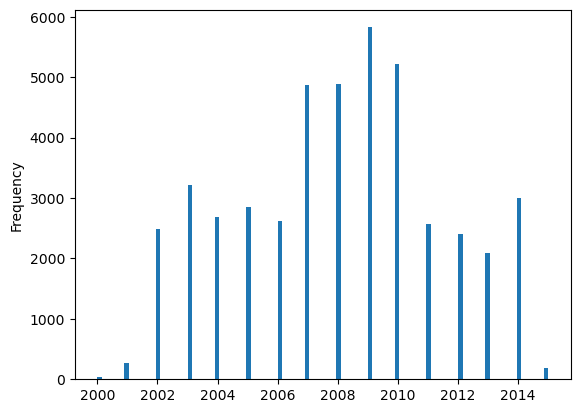

In [111]:
import matplotlib.pyplot as plt
data['comp_year'].plot.hist(bins=100)
plt.show()

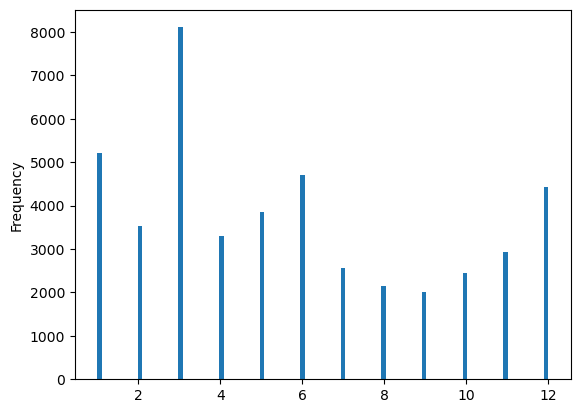

In [112]:
import matplotlib.pyplot as plt
data['comp_month'].plot.hist(bins=100)
plt.show()

**Handling a new data source for DDL – a satellite-derived measure of housing density managed by a government office**

Data management has a great role in data science and economics, I most probably will be using AWS S3 for data storage or Google Cloud Platform with servers in 2 to 3 locations for distributed systems, that can provide better storage at economical rate.

Data quality refers to the level of accuracy, completeness, consistency, and reliability of data. It is a critical aspect of managing data, as poor data quality can lead to incorrect insights and decisions.

To ensure data quality, it is important to consider the following steps throughout the entire data pipeline:

1. Ingestion:

 Verifying the source of the data and ensure that it is reliable and trustworthy.
 
 Validating the data format and structure to make sure it matches the expected format.
 

2. Transformation:

 Appling appropriate data transformations to make sure that the data is in the desired format.

 Ensuring that the data is properly scaled, normalized, and encoded.

 Checking for missing values and handle them appropriately.
 

3. Storage:

 Storing the data in a secure and efficient manner, with appropriate backup and recovery strategies.


4. Serving:

 Creating a secure and controlled environment for accessing the data.

 Documenting the data and its attributes, along with the transformations and processes applied.

